# Projeto 3 - Rating de filmes (IMDB)

<img src="imdb.jpg"/, width=500, height=400 style="float: center; margin: 0px 0px 10px 10px">

#### Por: Marcelo Lisboa de Castro Reis, Tiago Niemeyer Bergamo  e Bruno Kaczelnik- 2C Engenharia Insper

A partir do elenco, diretores, gênero do filme, ratings de filmes da mesma “linha”, bilheteria, pretendemos avaliar qual será a nota que um filme receberá. 

**O nosso projeto pode ser encontrado no seguinte GitHub:** https://github.com/Marcelolcr/Projeto-1---Ciencia-de-Dados.git

**Referências (Link do dataset):** 
- https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
- https://datasets.imdbws.com/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

Criando nosso dataframe e limpando-o, descartamos indicadores que não tem relação ou relevância alguma para a avaliação do filme:

In [2]:
#Criando o dataframe Treinamento
imdb = pd.read_csv('movie_metadata.csv')
imdb["movie_title"] = [k.replace("\xa0","") for k in imdb["movie_title"]]
imdb = imdb.dropna(0)
imdb = imdb.set_index('movie_title')
imdb = imdb.drop(['aspect_ratio','movie_imdb_link','facenumber_in_poster','plot_keywords'], axis=1)
imdb.head(3)#sort_values(by='gross', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,Wes Studi,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,Jack Davenport,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,Stephanie Sigman,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000


## Análise Exploratória: ##

In [ ]:
sns.pairplot(imdb, vars=['duration','director_facebook_likes','actor_3_facebook_likes','actor_2_facebook_likes',
                         'actor_1_facebook_likes'], hue='imdb_score')

In [ ]:
sns.pairplot(imdb, vars=['title_year','num_voted_users','num_critic_for_reviews',
                        'num_user_for_reviews'], hue='imdb_score')

In [ ]:
sns.pairplot(imdb, vars=['gross','cast_total_facebook_likes','movie_facebook_likes','budget'], hue='imdb_score')

In [ ]:
imdb.corr()

Olhando as correlações, podemos perceber que tanto o "actor_1_facebook_likes" e "cast_total_facebook_likes" como o "num_voted_users" e "num_user_for_reviews" estão com correlações altíssimas, o que quer dizer que podemos desconsiderar uma das  colunas, pois uma pode explicar a outra. Basta agora escolher qual explica mais.

Além disso, observando os pairplots, vimos que diversos indicadores tem em grande maioria, principalmente os relacionados com likes, valores iguais a zero. Portanto decidimos que seria melhor descartá-los por insuficiência de dados para análise.

In [3]:
imdb_ = imdb.drop(['num_voted_users','num_voted_users','director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'budget', 'movie_facebook_likes'], axis=1)
imdb_.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'actor_2_name', 'gross', 'genres', 'actor_1_name', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'title_year', 'imdb_score'],
      dtype='object')

In [4]:
print(imdb_["color"].value_counts())
print(imdb_["language"].value_counts())
print(imdb_["country"].value_counts())
print(imdb_["content_rating"].value_counts())

Color               3632
 Black and White     124
Name: color, dtype: int64
English       3598
French          34
Spanish         23
Mandarin        15
German          10
Japanese        10
Cantonese        7
Italian          7
Hindi            5
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Danish           3
Dutch            3
Persian          3
Aboriginal       2
Indonesian       2
Dari             2
Vietnamese       1
Kazakh           1
Romanian         1
Hungarian        1
Aramaic          1
None             1
Hebrew           1
Russian          1
Zulu             1
Czech            1
Bosnian          1
Filipino         1
Arabic           1
Maya             1
Mongolian        1
Name: language, dtype: int64
USA               2987
UK                 318
France             101
Germany             80
Canada              59
Australia           39
Spain               21
Japan               15
Hong Kong           13
China               13
Italy              

Novamente por insuficiência de dados para análise, resolvemos que seria melhor descartar "color", "language" e "country".

In [5]:
imdb_ = imdb_.drop(['language','country','color'], axis=1)

In [ ]:
sns.pairplot(imdb_, hue='imdb_score')

## Algorítimo: Montando o classificador
#### Iniciando com Naive Bayes Multiclass

Primeiramente classificamos as notas em 5 grupos: Muito Bom, Bom, Neutro, Ruim e Muito Ruim.

In [6]:
def Evaluation (column):
    if column['imdb_score'] >= 8.0 :
        return 'Muito Bom'
    if column['imdb_score'] < 8.0 and column['imdb_score'] >= 6.5:
        return 'Bom'
    if column['imdb_score'] >= 5.0 and column['imdb_score'] < 6.5:
        return 'Neutro'
    if column['imdb_score'] < 5.0 and column['imdb_score'] >= 3.0:
        return 'Ruim'
    if column['imdb_score'] < 3.0:
        return 'Muito Ruim'

In [7]:
imdb_['Evaluation'] = imdb_.apply(lambda column: Evaluation (column), axis=1)

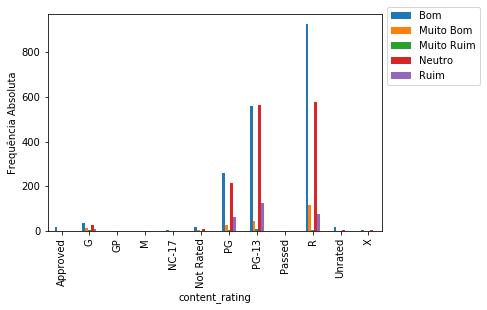

In [8]:
ct1 = pd.crosstab(imdb_.content_rating, imdb_.Evaluation)
ct1.plot(kind='bar')
plt.ylabel('Frequência Absoluta')
plt.legend(loc='center left', bbox_to_anchor=(1,0.85))

 **Variaveis importantes:** Aqui escolhemos as variáveis que, por meio da análise explora
 VOLTAR

In [9]:
imdb2 = imdb_[["director_name", "actor_2_name", 'actor_1_name', 'actor_3_name',"genres", "Evaluation"]]
imdb2['genres'] = imdb2['genres'].apply(lambda x: x.split('|'))
imdb2.head() #trocar para todas as variaveis importantes

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,director_name,actor_2_name,actor_1_name,actor_3_name,genres,Evaluation
movie_title,,,,,,
Avatar,James Cameron,Joel David Moore,CCH Pounder,Wes Studi,"[Action, Adventure, Fantasy, Sci-Fi]",Bom
Pirates of the Caribbean: At World's End,Gore Verbinski,Orlando Bloom,Johnny Depp,Jack Davenport,"[Action, Adventure, Fantasy]",Bom
Spectre,Sam Mendes,Rory Kinnear,Christoph Waltz,Stephanie Sigman,"[Action, Adventure, Thriller]",Bom
The Dark Knight Rises,Christopher Nolan,Christian Bale,Tom Hardy,Joseph Gordon-Levitt,"[Action, Thriller]",Muito Bom
John Carter,Andrew Stanton,Samantha Morton,Daryl Sabara,Polly Walker,"[Action, Adventure, Sci-Fi]",Bom


**Elenco:** Começamos pelo elenco, formado pelo diretor e os três atores principais, de cada filme. Criamos um dataframe separado com cada variável em uma coluna. Construimos um elemento X, baseado no elenco, e um Y, baseado nas avaliações. Depois disso, separamos os dados em uma base de treino e outra de teste, 80% e 20% respectivamente. Com isso pronto, implementamos no modelo Multinomial Naive Bayes, criando os 'vetores' de cada um. Após isso, checamos a acurácia do modelo, que foi de 50% de sucesso, ou seja, classificou corretamente os filmes, a partir do elenco.

In [10]:
imdb_cast = imdb[["director_name", "actor_2_name", 'actor_1_name', 'actor_3_name']]
imdb_cast.head()

,director_name,actor_2_name,actor_1_name,actor_3_name
movie_title,,,,
Avatar,James Cameron,Joel David Moore,CCH Pounder,Wes Studi
Pirates of the Caribbean: At World's End,Gore Verbinski,Orlando Bloom,Johnny Depp,Jack Davenport
Spectre,Sam Mendes,Rory Kinnear,Christoph Waltz,Stephanie Sigman
The Dark Knight Rises,Christopher Nolan,Christian Bale,Tom Hardy,Joseph Gordon-Levitt
John Carter,Andrew Stanton,Samantha Morton,Daryl Sabara,Polly Walker


In [11]:
alldir_actTotal = imdb_cast.values.tolist()
alldir_act = []
for i in alldir_actTotal:
    alldir_act.extend(i)
alldir_act = list(set(alldir_act))

#def dir_actToVec(dir_act):
#    global alldir_act
#    return [1 if str(i) in dir_act else 0 for i in alldir_act]

alldir_actT = []
for listas in alldir_actTotal:
    alldir_actT.append(' '.join(listas))

#--------------
notas = imdb2['Evaluation'].values.tolist()
index_ = round(len(alldir_actT) * 0.8)

X_treino_, X_teste_ = alldir_actT[:index_], alldir_actT[index_:]
Y_treino_, Y_teste_ = notas[:index_], notas[index_:]
len(X_treino_), len(Y_treino_), len(X_teste_), len(Y_teste_)

(3005, 3005, 751, 751)

In [12]:
notas = imdb2['Evaluation'].values.tolist()
index = round((imdb_cast.index.size)*0.8)

X_treino__, X_teste__ = imdb_cast['director_name'][:index], imdb_cast['director_name'][index:]
X_treino_, X_teste_ = imdb_cast['actor_2_name'][:index], imdb_cast['actor_2_name'][index:]
_X_treino, _X_teste = imdb_cast['actor_1_name'][:index], imdb_cast['actor_1_name'][index:]
__X_treino, __X_teste = imdb_cast['actor_3_name'][:index], imdb_cast['actor_3_name'][index:]
X_treino, X_teste = X_treino__ + X_treino_ + _X_treino + __X_treino, X_teste_ +  X_teste__ + _X_teste +  __X_teste

Y_treino, Y_teste = notas[:index], notas[index:]
len(X_treino), len(Y_treino), len(X_teste), len(Y_teste)

(3005, 3005, 751, 751)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Nau=ive Bayes multiclasse é o que está sendo usado aqui
#SVC procurar
#Random Forest
# Cria modelo.
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", MultinomialNB())
])

# Treina modelo.
model.fit(X_treino, Y_treino);

In [14]:
Y_pred = model.predict(X_teste)

acc = accuracy_score(Y_teste, Y_pred)
acc

0.5139813581890812

**Genero:** Como para o elenco, fizemos o mesmo para os diferentes genêros, pegando os 7 primeiros de cada um. Criamos outro dataframe separando cada variável em uma coluna. Construimos um elemento X, baseado no gêneros, e um Y, baseado nas avaliações. Depois disso, separamos os dados em uma base de treino e outra de teste, 80% e 20% respectivamente. Com isso pronto, implementamos no modelo Multinomial Naive Bayes, criando os 'vetores' de cada um. Após isso, checamos a acurácia do modelo, que foi de 59% de sucesso, ou seja, classificou corretamente os filmes, a partir dos generos.

In [15]:
imdb_gen = imdb2.drop(['Evaluation',"director_name", "actor_2_name", 'actor_1_name', 'actor_3_name'], axis=1)
#imdb_gen = imdb_gen.join(imdb_gen['genres'].str.split(', ',1, expand=True).rename(columns = {0:'gen1',1:'gen2'}))

In [16]:
gen = imdb2['genres']
Genero_1 = []
Genero_2 = []
Genero_3 = []
Genero_4 = []
Genero_5 = []
Genero_6 = []
Genero_7 = []
for g in gen:
    Genero_1.append(g[0])
    if len(g) < 2:
        Genero_2.append("")
    else:
        Genero_2.append(g[1])
    if len(g) < 3:
        Genero_3.append("")
    else:
        Genero_3.append(g[2])
    if len(g) < 4:
        Genero_4.append("")
    else:
        Genero_4.append(g[3])
    if len(g) < 5:
        Genero_5.append("")
    else:
        Genero_5.append(g[4])
    if len(g) < 6:
        Genero_6.append("")
    else:
        Genero_6.append(g[5])
    if len(g) < 7:
        Genero_7.append("")
    else:
        Genero_7.append(g[6])

In [17]:
imdb_gen["Gen1"] = Genero_1
imdb_gen["Gen2"] = Genero_2
imdb_gen["Gen3"] = Genero_3
imdb_gen["Gen4"] = Genero_4
imdb_gen["Gen5"] = Genero_5
imdb_gen["Gen6"] = Genero_6
imdb_gen["Gen7"] = Genero_7
imdb_gen

,genres,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Gen7
movie_title,,,,,,,,
Avatar,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,,,
Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,,,,
Spectre,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,,,,
The Dark Knight Rises,"[Action, Thriller]",Action,Thriller,,,,,
John Carter,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,,,,
Spider-Man 3,"[Action, Adventure, Romance]",Action,Adventure,Romance,,,,
Tangled,"[Adventure, Animation, Comedy, Family, Fantasy...",Adventure,Animation,Comedy,Family,Fantasy,Musical,Romance
Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,,,,
Harry Potter and the Half-Blood Prince,"[Adventure, Family, Fantasy, Mystery]",Adventure,Family,Fantasy,Mystery,,,


In [18]:
allGenresTotal = imdb2["genres"].values.tolist()
allGenres = []
for i in allGenresTotal:
    allGenres.extend(i)
allGenres = sorted(list(set(allGenres))) #sorted deixa em ordem alfabetica

# def genToVec(gen):
#    global allGenres
#    return [1 if i in gen else 0 for i in allGenres]

# imdb2['genresVec'] = imdb2['genres'].apply(genToVec)
# imdb2['dir_actVec'] = imdb_cast['director_name'].apply(dir_actToVec)
# imdb2.head()

In [19]:
index_gen = round((imdb_gen.index.size)*0.8)

Xgen_treino = imdb_gen['Gen1'][:index_gen] + imdb_gen['Gen2'][:index_gen] + imdb_gen['Gen3'][:index_gen] + imdb_gen['Gen4'][:index_gen] + imdb_gen['Gen5'][:index_gen] + imdb_gen['Gen6'][:index_gen] + imdb_gen['Gen7'][:index_gen]
Xgen_teste = imdb_gen['Gen1'][index_gen:] + imdb_gen['Gen2'][index_gen:] + imdb_gen['Gen3'][index_gen:] + imdb_gen['Gen4'][index_gen:] + imdb_gen['Gen5'][index_gen:] + imdb_gen['Gen6'][index_gen:] + imdb_gen['Gen7'][index_gen:]


Ygen_treino, Ygen_teste = notas[:index], notas[index:]
#len(Xgen_treino), len(Ygen_treino), len(Xgen_teste), len(Ygen_teste)

In [20]:
model.fit(Xgen_treino, Ygen_treino);

In [21]:
Ygen_pred = model.predict(Xgen_teste)

acc2 = accuracy_score(Ygen_teste, Ygen_pred)
acc2

0.59254327563249

**Elenco + Genero:** Agora, nós juntamos os dois elementos X que criamos, elenco e genero, em um só. Esse novo conjunto de dados, foi dvidido em uma base de treino e uma de teste, 80% e 20% respectivamente. Com isso pronto, implementamos no modelo Multinomial Naive Bayes, criando os 'vetores' de cada um. Após isso, checamos a acurácia do modelo, que foi de 54% de sucesso, ou seja, classificou corretamente os filmes, a partir do elenco e dos generos.

In [22]:
Xcast_genres_treino = Xgen_treino + X_treino
Xcast_genres_teste = Xgen_teste + X_teste

model.fit(Xcast_genres_treino, Ygen_treino);

In [23]:
Ycast_genres_pred = model.predict(Xcast_genres_teste)

acc3 = accuracy_score(Y_teste, Ycast_genres_pred)
acc3

0.5406125166444741

In [24]:
#Pondo o resto

In [25]:
imdb_tot = imdb_.drop(['genres','imdb_score'], axis=1)
#imdb_tot = imdb_tot.join(imdb_gen)
#imdb_tot["movie_title"].value_counts()
#imdb_tot.index.sort_values(by="movie_title")
imdb_tot.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,actor_3_name,num_user_for_reviews,content_rating,title_year,Evaluation
movie_title,,,,,,,,,,,
Avatar,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,3054.0,PG-13,2009.0,Bom
Pirates of the Caribbean: At World's End,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,1238.0,PG-13,2007.0,Bom
Spectre,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,994.0,PG-13,2015.0,Bom
The Dark Knight Rises,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,2701.0,PG-13,2012.0,Muito Bom
John Carter,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,Polly Walker,738.0,PG-13,2012.0,Bom


In [26]:
imdb_tot = imdb_tot.astype(str) #transformando para str
imdb_tot

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,actor_3_name,num_user_for_reviews,content_rating,title_year,Evaluation
movie_title,,,,,,,,,,,
Avatar,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,Wes Studi,3054.0,PG-13,2009.0,Bom
Pirates of the Caribbean: At World's End,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Johnny Depp,Jack Davenport,1238.0,PG-13,2007.0,Bom
Spectre,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Christoph Waltz,Stephanie Sigman,994.0,PG-13,2015.0,Bom
The Dark Knight Rises,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Tom Hardy,Joseph Gordon-Levitt,2701.0,PG-13,2012.0,Muito Bom
John Carter,Andrew Stanton,462.0,132.0,Samantha Morton,73058679.0,Daryl Sabara,Polly Walker,738.0,PG-13,2012.0,Bom
Spider-Man 3,Sam Raimi,392.0,156.0,James Franco,336530303.0,J.K. Simmons,Kirsten Dunst,1902.0,PG-13,2007.0,Neutro
Tangled,Nathan Greno,324.0,100.0,Donna Murphy,200807262.0,Brad Garrett,M.C. Gainey,387.0,PG,2010.0,Bom
Avengers: Age of Ultron,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Chris Hemsworth,Scarlett Johansson,1117.0,PG-13,2015.0,Bom
Harry Potter and the Half-Blood Prince,David Yates,375.0,153.0,Daniel Radcliffe,301956980.0,Alan Rickman,Rupert Grint,973.0,PG,2009.0,Bom


In [37]:
index_tot = round((imdb_tot.index.size)*0.8) #PQ TA DANDO DIFERENTE???

#Xtot_treino = imdb_tot['num_critic_for_reviews'][:imdb_tot] + imdb_tot['duration'][:imdb_tot] + imdb_tot['gross'][:imdb_tot] + imdb_tot['num_user_for_reviews'][:imdb_tot] 
#Xtot_teste = imdb_tot['num_critic_for_reviews'][imdb_tot:] + imdb_tot['duration'][imdb_tot:] + imdb_tot['gross'][imdb_tot:] + imdb_tot['num_user_for_reviews'][imdb_tot:] 
Ytot_treino = notas[:index_tot]
Ytot_teste = notas[index_tot:]

#len(Xtot_treino)

In [38]:
Xtot_treino = imdb_tot['director_name'][:imdb_tot]

TypeError: '                                                  director_name  \
movie_title                                                       
Avatar                                            James Cameron   
Pirates of the Caribbean: At World's End         Gore Verbinski   
Spectre                                              Sam Mendes   
The Dark Knight Rises                         Christopher Nolan   
John Carter                                      Andrew Stanton   
Spider-Man 3                                          Sam Raimi   
Tangled                                            Nathan Greno   
Avengers: Age of Ultron                             Joss Whedon   
Harry Potter and the Half-Blood Prince              David Yates   
Batman v Superman: Dawn of Justice                  Zack Snyder   
Superman Returns                                   Bryan Singer   
Quantum of Solace                                  Marc Forster   
Pirates of the Caribbean: Dead Man's Chest       Gore Verbinski   
The Lone Ranger                                  Gore Verbinski   
Man of Steel                                        Zack Snyder   
The Chronicles of Narnia: Prince Caspian         Andrew Adamson   
The Avengers                                        Joss Whedon   
Pirates of the Caribbean: On Stranger Tides        Rob Marshall   
Men in Black 3                                 Barry Sonnenfeld   
The Hobbit: The Battle of the Five Armies         Peter Jackson   
The Amazing Spider-Man                                Marc Webb   
Robin Hood                                         Ridley Scott   
The Hobbit: The Desolation of Smaug               Peter Jackson   
The Golden Compass                                  Chris Weitz   
King Kong                                         Peter Jackson   
Titanic                                           James Cameron   
Captain America: Civil War                        Anthony Russo   
Battleship                                           Peter Berg   
Jurassic World                                  Colin Trevorrow   
Skyfall                                              Sam Mendes   
...                                                         ...   
Tadpole                                             Gary Winick   
Once                                                John Carney   
The Horse Boy                                Michel Orion Scott   
The Texas Chain Saw Massacre                        Tobe Hooper   
Roger & Me                                        Michael Moore   
Facing the Giants                                 Alex Kendrick   
The Gallows                                        Travis Cluff   
Hollywood Shuffle                               Robert Townsend   
The Lost Skeleton of Cadavra                      Larry Blamire   
Cheap Thrills                                         E.L. Katz   
The Last House on the Left                       Dennis Iliadis   
Pi                                             Darren Aronofsky   
20 Dates                                        Myles Berkowitz   
Super Size Me                                   Morgan Spurlock   
The FP                                            Brandon Trost   
Happy Christmas                                    Joe Swanberg   
The Brothers McMullen                              Edward Burns   
Tiny Furniture                                      Lena Dunham   
George Washington                            David Gordon Green   
Smiling Fish & Goat on Fire                        Kevin Jordan   
Clerks                                              Kevin Smith   
In the Company of Men                               Neil LaBute   
Sabotage                                             David Ayer   
Slacker                                       Richard Linklater   
Pink Flamingos                                      John Waters   
Clean                                           Olivier Assayas   
The Circle                                         Jafar Panahi   
Primer                                            Shane Carruth   
El Mariachi                                    Robert Rodriguez   
My Date with Drew                                      Jon Gunn   

                                            num_critic_for_reviews duration  \
movie_title                                                                   
Avatar                                                       723.0    178.0   
Pirates of the Caribbean: At World's End                     302.0    169.0   
Spectre                                                      602.0    148.0   
The Dark Knight Rises                                        813.0    164.0   
John Carter                                                  462.0    132.0   
Spider-Man 3                                                 392.0    156.0   
Tangled                                                      324.0    100.0   
Avengers: Age of Ultron                                      635.0    141.0   
Harry Potter and the Half-Blood Prince                       375.0    153.0   
Batman v Superman: Dawn of Justice                           673.0    183.0   
Superman Returns                                             434.0    169.0   
Quantum of Solace                                            403.0    106.0   
Pirates of the Caribbean: Dead Man's Chest                   313.0    151.0   
The Lone Ranger                                              450.0    150.0   
Man of Steel                                                 733.0    143.0   
The Chronicles of Narnia: Prince Caspian                     258.0    150.0   
The Avengers                                                 703.0    173.0   
Pirates of the Caribbean: On Stranger Tides                  448.0    136.0   
Men in Black 3                                               451.0    106.0   
The Hobbit: The Battle of the Five Armies                    422.0    164.0   
The Amazing Spider-Man                                       599.0    153.0   
Robin Hood                                                   343.0    156.0   
The Hobbit: The Desolation of Smaug                          509.0    186.0   
The Golden Compass                                           251.0    113.0   
King Kong                                                    446.0    201.0   
Titanic                                                      315.0    194.0   
Captain America: Civil War                                   516.0    147.0   
Battleship                                                   377.0    131.0   
Jurassic World                                               644.0    124.0   
Skyfall                                                      750.0    143.0   
...                                                            ...      ...   
Tadpole                                                       91.0     78.0   
Once                                                         232.0     85.0   
The Horse Boy                                                 29.0     93.0   
The Texas Chain Saw Massacre                                 277.0     88.0   
Roger & Me                                                    40.0     91.0   
Facing the Giants                                             31.0    111.0   
The Gallows                                                  159.0     81.0   
Hollywood Shuffle                                             21.0     81.0   
The Lost Skeleton of Cadavra                                  88.0     90.0   
Cheap Thrills                                                193.0     88.0   
The Last House on the Left                                   241.0    114.0   
Pi                                                           138.0     84.0   
20 Dates                                                      32.0     87.0   
Super Size Me                                                193.0    100.0   
The FP                                                        66.0     82.0   
Happy Christmas                                               65.0     82.0   
The Brothers McMullen                                         36.0     98.0   
Tiny Furniture                                               113.0     98.0   
George Washington                                             75.0     90.0   
Smiling Fish & Goat on Fire                                   21.0     90.0   
Clerks                                                       136.0    102.0   
In the Company of Men                                         80.0     97.0   
Sabotage                                                     233.0    109.0   
Slacker                                                       61.0    100.0   
Pink Flamingos                                                73.0    108.0   
Clean                                                         81.0    110.0   
The Circle                                                    64.0     90.0   
Primer                                                       143.0     77.0   
El Mariachi                                                   56.0     81.0   
My Date with Drew                                             43.0     90.0   

                                                     actor_2_name  \
movie_title                                                         
Avatar                                           Joel David Moore   
Pirates of the Caribbean: At World's End            Orlando Bloom   
Spectre                                              Rory Kinnear   
The Dark Knight Rises                              Christian Bale   
John Carter                                       Samantha Morton   
Spider-Man 3                                         James Franco   
Tangled                                              Donna Murphy   
Avengers: Age of Ultron                         Robert Downey Jr.   
Harry Potter and the Half-Blood Prince           Daniel Radcliffe   
Batman v Superman: Dawn of Justice                   Lauren Cohan   
Superman Returns                                    Marlon Brando   
Quantum of Solace                                 Mathieu Amalric   
Pirates of the Caribbean: Dead Man's Chest          Orlando Bloom   
The Lone Ranger                                       Ruth Wilson   
Man of Steel                                   Christopher Meloni   
The Chronicles of Narnia: Prince Caspian     Pierfrancesco Favino   
The Avengers                                    Robert Downey Jr.   
Pirates of the Caribbean: On Stranger Tides           Sam Claflin   
Men in Black 3                                  Michael Stuhlbarg   
The Hobbit: The Battle of the Five Armies              Adam Brown   
The Amazing Spider-Man                            Andrew Garfield   
Robin Hood                                           William Hurt   
The Hobbit: The Desolation of Smaug                    Adam Brown   
The Golden Compass                                      Eva Green   
King Kong                                      Thomas Kretschmann   
Titanic                                              Kate Winslet   
Captain America: Civil War                     Scarlett Johansson   
Battleship                                    Alexander Skarsgård   
Jurassic World                                         Judy Greer   
Skyfall                                             Helen McCrory   
...                                                           ...   
Tadpole                                            Aaron Stanford   
Once                                              Markéta Irglová   
The Horse Boy                                      Rowan Isaacson   
The Texas Chain Saw Massacre                           Edwin Neal   
Roger & Me                                              Pat Boone   
Facing the Giants                                     Erin Bethea   
The Gallows                                       Cassidy Gifford   
Hollywood Shuffle                             Keenen Ivory Wayans   
The Lost Skeleton of Cadavra                           Brian Howe   
Cheap Thrills                                         Ethan Embry   
The Last House on the Left                          Monica Potter   
Pi                                                  Clint Mansell   
20 Dates                                             Tom Ardavany   
Super Size Me                                      Amanda Kearsan   
The FP                                                Sean Whalen   
Happy Christmas                                       Lena Dunham   
The Brothers McMullen                             Michael McGlone   
Tiny Furniture                                      Merritt Wever   
George Washington                                     Eddie Rouse   
Smiling Fish & Goat on Fire                        Christa Miller   
Clerks                                           Brian O'Halloran   
In the Company of Men                                 Matt Malloy   
Sabotage                                           Martin Donovan   
Slacker                                         Richard Linklater   
Pink Flamingos                                         Mink Stole   
Clean                                              Béatrice Dalle   
The Circle                                      Nargess Mamizadeh   
Primer                                             David Sullivan   
El Mariachi                                       Peter Marquardt   
My Date with Drew                                Brian Herzlinger   

                                                   gross  \
movie_title                                                
Avatar                                       760505847.0   
Pirates of the Caribbean: At World's End     309404152.0   
Spectre                                      200074175.0   
The Dark Knight Rises                        448130642.0   
John Carter                                   73058679.0   
Spider-Man 3                                 336530303.0   
Tangled                                      200807262.0   
Avengers: Age of Ultron                      458991599.0   
Harry Potter and the Half-Blood Prince       301956980.0   
Batman v Superman: Dawn of Justice           330249062.0   
Superman Returns                             200069408.0   
Quantum of Solace                            168368427.0   
Pirates of the Caribbean: Dead Man's Chest   423032628.0   
The Lone Ranger                               89289910.0   
Man of Steel                                 291021565.0   
The Chronicles of Narnia: Prince Caspian     141614023.0   
The Avengers                                 623279547.0   
Pirates of the Caribbean: On Stranger Tides  241063875.0   
Men in Black 3                               179020854.0   
The Hobbit: The Battle of the Five Armies    255108370.0   
The Amazing Spider-Man                       262030663.0   
Robin Hood                                   105219735.0   
The Hobbit: The Desolation of Smaug          258355354.0   
The Golden Compass                            70083519.0   
King Kong                                    218051260.0   
Titanic                                      658672302.0   
Captain America: Civil War                   407197282.0   
Battleship                                    65173160.0   
Jurassic World                               652177271.0   
Skyfall                                      304360277.0   
...                                                  ...   
Tadpole                                        2882062.0   
Once                                           9437933.0   
The Horse Boy                                   155984.0   
The Texas Chain Saw Massacre                  30859000.0   
Roger & Me                                     6706368.0   
Facing the Giants                             10174663.0   
The Gallows                                   22757819.0   
Hollywood Shuffle                              5228617.0   
The Lost Skeleton of Cadavra                    110536.0   
Cheap Thrills                                    59379.0   
The Last House on the Left                    32721635.0   
Pi                                             3216970.0   
20 Dates                                        536767.0   
Super Size Me                                 11529368.0   
The FP                                           40557.0   
Happy Christmas                                  30084.0   
The Brothers McMullen                         10246600.0   
Tiny Furniture                                  389804.0   
George Washington                               241816.0   
Smiling Fish & Goat on Fire                     277233.0   
Clerks                                         3151130.0   
In the Company of Men                          2856622.0   
Sabotage                                      10499968.0   
Slacker                                        1227508.0   
Pink Flamingos                                  180483.0   
Clean                                           136007.0   
The Circle                                      673780.0   
Primer                                          424760.0   
El Mariachi                                    2040920.0   
My Date with Drew                                85222.0   

                                                        actor_1_name  \
movie_title                                                            
Avatar                                                   CCH Pounder   
Pirates of the Caribbean: At World's End                 Johnny Depp   
Spectre                                              Christoph Waltz   
The Dark Knight Rises                                      Tom Hardy   
John Carter                                             Daryl Sabara   
Spider-Man 3                                            J.K. Simmons   
Tangled                                                 Brad Garrett   
Avengers: Age of Ultron                              Chris Hemsworth   
Harry Potter and the Half-Blood Prince                  Alan Rickman   
Batman v Superman: Dawn of Justice                      Henry Cavill   
Superman Returns                                        Kevin Spacey   
Quantum of Solace                                 Giancarlo Giannini   
Pirates of the Caribbean: Dead Man's Chest               Johnny Depp   
The Lone Ranger                                          Johnny Depp   
Man of Steel                                            Henry Cavill   
The Chronicles of Narnia: Prince Caspian              Peter Dinklage   
The Avengers                                         Chris Hemsworth   
Pirates of the Caribbean: On Stranger Tides              Johnny Depp   
Men in Black 3                                            Will Smith   
The Hobbit: The Battle of the Five Armies               Aidan Turner   
The Amazing Spider-Man                                    Emma Stone   
Robin Hood                                                 Mark Addy   
The Hobbit: The Desolation of Smaug                     Aidan Turner   
The Golden Compass                                   Christopher Lee   
King Kong                                                Naomi Watts   
Titanic                                            Leonardo DiCaprio   
Captain America: Civil War                         Robert Downey Jr.   
Battleship                                               Liam Neeson   
Jurassic World                                   Bryce Dallas Howard   
Skyfall                                                Albert Finney   
...                                                              ...   
Tadpole                                                Bebe Neuwirth   
Once                                                    Glen Hansard   
The Horse Boy                                         Temple Grandin   
The Texas Chain Saw Massacre                           Gunnar Hansen   
Roger & Me                                             Michael Moore   
Facing the Giants                                      Alex Kendrick   
The Gallows                                            Pfeifer Brown   
Hollywood Shuffle                                    Robert Townsend   
The Lost Skeleton of Cadavra                           Fay Masterson   
Cheap Thrills                                      Brighton Sharbino   
The Last House on the Left                              Tony Goldwyn   
Pi                                                     Mark Margolis   
20 Dates                                                 Tia Carrere   
Super Size Me                                        Chemeeka Walker   
The FP                                           Clifton Collins Jr.   
Happy Christmas                                        Anna Kendrick   
The Brothers McMullen                                   Shari Albert   
Tiny Furniture                                           Lena Dunham   
George Washington                                     Paul Schneider   
Smiling Fish & Goat on Fire                           Derick Martini   
Clerks                                                   Jason Mewes   
In the Company of Men                                  Stacy Edwards   
Sabotage                                               Mireille Enos   
Slacker                                               Tommy Pallotta   
Pink Flamingos                                                Divine   
Clean                                                  Maggie Cheung   
The Circle                                   Fereshteh Sadre Orafaiy   
Primer                                                 Shane Carruth   
El Mariachi                                          Carlos Gallardo   
My Date with Drew                                        John August   

                                                     actor_3_name  \
movie_title                                                         
Avatar                                                  Wes Studi   
Pirates of the Caribbean: At World's End           Jack Davenport   
Spectre                                          Stephanie Sigman   
The Dark Knight Rises                        Joseph Gordon-Levitt   
John Carter                                          Polly Walker   
Spider-Man 3                                        Kirsten Dunst   
Tangled                                               M.C. Gainey   
Avengers: Age of Ultron                        Scarlett Johansson   
Harry Potter and the Half-Blood Prince               Rupert Grint   
Batman v Superman: Dawn of Justice                 Alan D. Purwin   
Superman Returns                                   Frank Langella   
Quantum of Solace                                    Rory Kinnear   
Pirates of the Caribbean: Dead Man's Chest         Jack Davenport   
The Lone Ranger                                     Tom Wilkinson   
Man of Steel                                         Harry Lennix   
The Chronicles of Narnia: Prince Caspian           Damián Alcázar   
The Avengers                                   Scarlett Johansson   
Pirates of the Caribbean: On Stranger Tides        Stephen Graham   
Men in Black 3                                 Nicole Scherzinger   
The Hobbit: The Battle of the Five Armies           James Nesbitt   
The Amazing Spider-Man                                Chris Zylka   
Robin Hood                                           Scott Grimes   
The Hobbit: The Desolation of Smaug                 James Nesbitt   
The Golden Compass                           Kristin Scott Thomas   
King Kong                                              Evan Parke   
Titanic                                             Gloria Stuart   
Captain America: Civil War                            Chris Evans   
Battleship                                         Tadanobu Asano   
Jurassic World                                            Omar Sy   
Skyfall                                              Rory Kinnear   
...                                                           ...   
Tadpole                                                Ron Rifkin   
Once                                                 Darren Healy   
The Horse Boy                                   Simon Baron-Cohen   
The Texas Chain Saw Massacre                        Marilyn Burns   
Roger & Me                                            Bob Eubanks   
Facing the Giants                                  Shannen Fields   
The Gallows                                         Reese Mishler   
Hollywood Shuffle                                    Helen Martin   
The Lost Skeleton of Cadavra                        Larry Blamire   
Cheap Thrills                                      Elissa Dowling   
The Last House on the Left                        Martha MacIsaac   
Pi                                              Stanley B. Herman   
20 Dates                                             Robert McKee   
Super Size Me                                    Amelia Giancarlo   
The FP                                              James DeBello   
Happy Christmas                                       Mark Webber   
The Brothers McMullen                                Maxine Bahns   
Tiny Furniture                                       Jemima Kirke   
George Washington                                Damian Jewan Lee   
Smiling Fish & Goat on Fire                           Ion Overman   
Clerks                                              Jeff Anderson   
In the Company of Men                                 Jason Dixie   
Sabotage                                           Maurice Compte   
Slacker                                             Jean Caffeine   
Pink Flamingos                                       Edith Massey   
Clean                                                Don McKellar   
The Circle                                       Mojgan Faramarzi   
Primer                                               Casey Gooden   
El Mariachi                                        Consuelo Gómez   
My Date with Drew                                        Jon Gunn   

                                            num_user_for_reviews  \
movie_title                                                        
Avatar                                                    3054.0   
Pirates of the Caribbean: At World's End                  1238.0   
Spectre                                                    994.0   
The Dark Knight Rises                                     2701.0   
John Carter                                                738.0   
Spider-Man 3                                              1902.0   
Tangled                                                    387.0   
Avengers: Age of Ultron                                   1117.0   
Harry Potter and the Half-Blood Prince                     973.0   
Batman v Superman: Dawn of Justice                        3018.0   
Superman Returns                                          2367.0   
Quantum of Solace                                         1243.0   
Pirates of the Caribbean: Dead Man's Chest                1832.0   
The Lone Ranger                                            711.0   
Man of Steel                                              2536.0   
The Chronicles of Narnia: Prince Caspian                   438.0   
The Avengers                                              1722.0   
Pirates of the Caribbean: On Stranger Tides                484.0   
Men in Black 3                                             341.0   
The Hobbit: The Battle of the Five Armies                  802.0   
The Amazing Spider-Man                                    1225.0   
Robin Hood                                                 546.0   
The Hobbit: The Desolation of Smaug                        951.0   
The Golden Compass                                         666.0   
King Kong                                                 2618.0   
Titanic                                                   2528.0   
Captain America: Civil War                                1022.0   
Battleship                                                 751.0   
Jurassic World                                            1290.0   
Skyfall                                                   1498.0   
...                                                          ...   
Tadpole                                                    101.0   
Once                                                       329.0   
The Horse Boy                                                9.0   
The Texas Chain Saw Massacre                               826.0   
Roger & Me                                                 133.0   
Facing the Giants                                          382.0   
The Gallows                                                150.0   
Hollywood Shuffle                                           32.0   
The Lost Skeleton of Cadavra                               118.0   
Cheap Thrills                                               52.0   
The Last House on the Left                                 279.0   
Pi                                                         586.0   
20 Dates                                                    83.0   
Super Size Me                                              404.0   
The FP                                                      22.0   
Happy Christmas                                             23.0   
The Brothers McMullen                                       36.0   
Tiny Furniture                                              35.0   
George Washington                                           76.0   
Smiling Fish & Goat on Fire                                 26.0   
Clerks                                                     615.0   
In the Company of Men                                      197.0   
Sabotage                                                   212.0   
Slacker                                                     80.0   
Pink Flamingos                                             183.0   
Clean                                                       39.0   
The Circle                                                  26.0   
Primer                                                     371.0   
El Mariachi                                                130.0   
My Date with Drew                                           84.0   

                                            content_rating title_year  \
movie_title                                                             
Avatar                                               PG-13     2009.0   
Pirates of the Caribbean: At World's End             PG-13     2007.0   
Spectre                                              PG-13     2015.0   
The Dark Knight Rises                                PG-13     2012.0   
John Carter                                          PG-13     2012.0   
Spider-Man 3                                         PG-13     2007.0   
Tangled                                                 PG     2010.0   
Avengers: Age of Ultron                              PG-13     2015.0   
Harry Potter and the Half-Blood Prince                  PG     2009.0   
Batman v Superman: Dawn of Justice                   PG-13     2016.0   
Superman Returns                                     PG-13     2006.0   
Quantum of Solace                                    PG-13     2008.0   
Pirates of the Caribbean: Dead Man's Chest           PG-13     2006.0   
The Lone Ranger                                      PG-13     2013.0   
Man of Steel                                         PG-13     2013.0   
The Chronicles of Narnia: Prince Caspian                PG     2008.0   
The Avengers                                         PG-13     2012.0   
Pirates of the Caribbean: On Stranger Tides          PG-13     2011.0   
Men in Black 3                                       PG-13     2012.0   
The Hobbit: The Battle of the Five Armies            PG-13     2014.0   
The Amazing Spider-Man                               PG-13     2012.0   
Robin Hood                                           PG-13     2010.0   
The Hobbit: The Desolation of Smaug                  PG-13     2013.0   
The Golden Compass                                   PG-13     2007.0   
King Kong                                            PG-13     2005.0   
Titanic                                              PG-13     1997.0   
Captain America: Civil War                           PG-13     2016.0   
Battleship                                           PG-13     2012.0   
Jurassic World                                       PG-13     2015.0   
Skyfall                                              PG-13     2012.0   
...                                                    ...        ...   
Tadpole                                              PG-13     2000.0   
Once                                                     R     2007.0   
The Horse Boy                                      Unrated     2009.0   
The Texas Chain Saw Massacre                             R     1974.0   
Roger & Me                                               R     1989.0   
Facing the Giants                                       PG     2006.0   
The Gallows                                              R     2015.0   
Hollywood Shuffle                                        R     1987.0   
The Lost Skeleton of Cadavra                            PG     2001.0   
Cheap Thrills                                    Not Rated     2013.0   
The Last House on the Left                               R     2009.0   
Pi                                                       R     1998.0   
20 Dates                                                 R     1998.0   
Super Size Me                                           PG     2004.0   
The FP                                                   R     2011.0   
Happy Christmas                                          R     2014.0   
The Brothers McMullen                                    R     1995.0   
Tiny Furniture                                   Not Rated     2010.0   
George Washington                                  Unrated     2000.0   
Smiling Fish & Goat on Fire                              R     1999.0   
Clerks                                                   R     1994.0   
In the Company of Men                                    R     1997.0   
Sabotage                                                 R     2014.0   
Slacker                                                  R     1991.0   
Pink Flamingos                                       NC-17     1972.0   
Clean                                                    R     2004.0   
The Circle                                       Not Rated     2000.0   
Primer                                               PG-13     2004.0   
El Mariachi                                              R     1992.0   
My Date with Drew                                       PG     2004.0   

                                            Evaluation  
movie_title                                             
Avatar                                             Bom  
Pirates of the Caribbean: At World's End           Bom  
Spectre                                            Bom  
The Dark Knight Rises                        Muito Bom  
John Carter                                        Bom  
Spider-Man 3                                    Neutro  
Tangled                                            Bom  
Avengers: Age of Ultron                            Bom  
Harry Potter and the Half-Blood Prince             Bom  
Batman v Superman: Dawn of Justice                 Bom  
Superman Returns                                Neutro  
Quantum of Solace                                  Bom  
Pirates of the Caribbean: Dead Man's Chest         Bom  
The Lone Ranger                                    Bom  
Man of Steel                                       Bom  
The Chronicles of Narnia: Prince Caspian           Bom  
The Avengers                                 Muito Bom  
Pirates of the Caribbean: On Stranger Tides        Bom  
Men in Black 3                                     Bom  
The Hobbit: The Battle of the Five Armies          Bom  
The Amazing Spider-Man                             Bom  
Robin Hood                                         Bom  
The Hobbit: The Desolation of Smaug                Bom  
The Golden Compass                              Neutro  
King Kong                                          Bom  
Titanic                                            Bom  
Captain America: Civil War                   Muito Bom  
Battleship                                      Neutro  
Jurassic World                                     Bom  
Skyfall                                            Bom  
...                                                ...  
Tadpole                                         Neutro  
Once                                               Bom  
The Horse Boy                                      Bom  
The Texas Chain Saw Massacre                       Bom  
Roger & Me                                         Bom  
Facing the Giants                                  Bom  
The Gallows                                       Ruim  
Hollywood Shuffle                                  Bom  
The Lost Skeleton of Cadavra                       Bom  
Cheap Thrills                                      Bom  
The Last House on the Left                         Bom  
Pi                                                 Bom  
20 Dates                                        Neutro  
Super Size Me                                      Bom  
The FP                                          Neutro  
Happy Christmas                                 Neutro  
The Brothers McMullen                              Bom  
Tiny Furniture                                  Neutro  
George Washington                                  Bom  
Smiling Fish & Goat on Fire                        Bom  
Clerks                                             Bom  
In the Company of Men                              Bom  
Sabotage                                        Neutro  
Slacker                                            Bom  
Pink Flamingos                                  Neutro  
Clean                                              Bom  
The Circle                                         Bom  
Primer                                             Bom  
El Mariachi                                        Bom  
My Date with Drew                                  Bom  

[3756 rows x 11 columns]' is an invalid key